# Plots of the results

This notebook contains the plots of the results of the assignment 2 of the Foundations of HPC course.
All results are compared to the theoretical peak performance of the orfeo nodes. The theoretical peak performance can be computed as:
$$Flops_{peak} = n_{cores} \times frequency \times (\frac{FLOP}{cycle})$$

### AMD EPYC™ 7H12

- $n_{cores} = 64$
- $frequency = 2.6$ GHz
- AMD Epyc 7H12 can reach at most $\frac{FLOP}{cycle} = 32$ operations per second regarding the floating point (single precision) operations and $\frac{FLOP}{cycle} = 16$ operations per second for the double precision operations.
- The theoretical peak performance is then $64 \times 2.6 \times 32 =  5324.8$ GFlops for single precision and $64 \times 2.6 \times 16 = 2662.4$ GFlops for double precision.

### Intel® Xeon® Gold 6126

- $n_{cores} = 12$
- $frequency = 2.6$ GHz
- The theoretical peak performance for an entire node is $1997$ GFlops (data found in the course material), half of the available cores are used (12 out of 24).
- For this experiment, the theoretical peak performance is then $\frac{1997}{2} = 998.5$ GFlops for double precision and $998.5 \cdot 2 = 1997$ Gflops for single precision.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

For each test, the corresponding statistics and indexes are computed, grouping the observations by size (or by the number of used cores). The results are then plotted in a line plot, with the statistics on the y-axis, and either the matrix size or the number of used cores on the x axis.

In [42]:
# This function summarizes the results of the experiments, preparing them for plotting
def get_summary(test = 'size_scaling', lib = 'mkl', node = "EPYC", precision = "float", policy = "spread"):

    match test:

        case 'size_scaling':
            ## Load data
            data_path = f"results/size_scaling/size_scaling_{node}_{lib}_{precision}_{policy}.csv"
            data = pd.read_csv(data_path)
            
            ## Compute mean gflops grouped by matrix size
            summary = data.groupby(['size']).mean('gflops').reset_index()
            return summary
        
        case 'core_scaling':
            ## Load data
            data_path = f"results/core_scaling/core_scaling_{node}_{lib}_{precision}_{policy}.csv"
            data = pd.read_csv(data_path)

            ## Compute mean time grouped by matrix size
            summary = data.groupby(['n_cores']).mean('time').reset_index()

            ## Compute speedup
            summary['speedup'] = summary['time'][0]/summary['time']

            ## Compute efficiency
            summary['efficiency'] = summary['speedup']/summary['n_cores']
            return summary
        
            

# Size scaling

### EPYC nodes - single precision

In [25]:
# Gather data for the plot
node = 'EPYC'
precision = 'float'

policy = 'spread'
ss_mkl_float_spread = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_float_spread = get_summary(
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
ss_mkl_float_close = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_float_close = get_summary(
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
ss_mkl_float_spread['test'] = 'MKL - spread'
ss_oblas_float_spread['test'] = 'OpenBLAS - spread'
ss_mkl_float_close['test'] = 'MKL - close'
ss_oblas_float_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
ss_epyc_float = pd.concat([
    ss_mkl_float_spread, 
    ss_oblas_float_spread, 
    ss_mkl_float_close, 
    ss_oblas_float_close
    ])

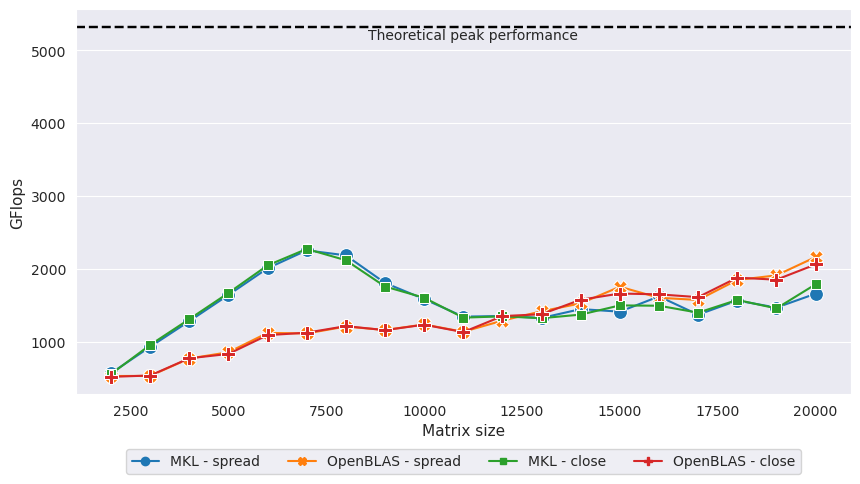

In [26]:
# Plot the results
plt.figure(figsize=(10, 5))

## Result lines
sns.lineplot(x='size',
             y='gflops', 
             hue='test', 
             data=ss_epyc_float, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             ).axhline(y=5324.8,        ## Theoretical peak performance line
                       color='black', 
                       linestyle='--', 
                       linewidth=1.75)
plt.text(x=11250, y=5210, s='Theoretical peak performance', va='center', ha='center')
## Styling
sns.set_style('darkgrid')
plt.ylabel('GFlops', fontsize=11)
plt.xlabel('Matrix size', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/size_scaling_epyc_float.png', dpi=250, bbox_inches='tight')
plt.show()

None of the libraries reaches the theoretical peak performance.

OBLAS shows better results with bigger matrices, while MKL seem better with small matrices.

Changing binding policy doesn't seem to do much.

## EPYC nodes - double precision

In [27]:
# Gather data for the plot
node = 'EPYC'
precision = 'double'

policy = 'spread'
ss_mkl_double_spread = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_double_spread = get_summary(
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
ss_mkl_double_close = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_double_close = get_summary(
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
ss_mkl_double_spread['test'] = 'MKL - spread'
ss_oblas_double_spread['test'] = 'OpenBLAS - spread'
ss_mkl_double_close['test'] = 'MKL - close'
ss_oblas_double_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
ss_epyc_double = pd.concat([
    ss_mkl_double_spread, 
    ss_oblas_double_spread, 
    ss_mkl_double_close, 
    ss_oblas_double_close
    ])

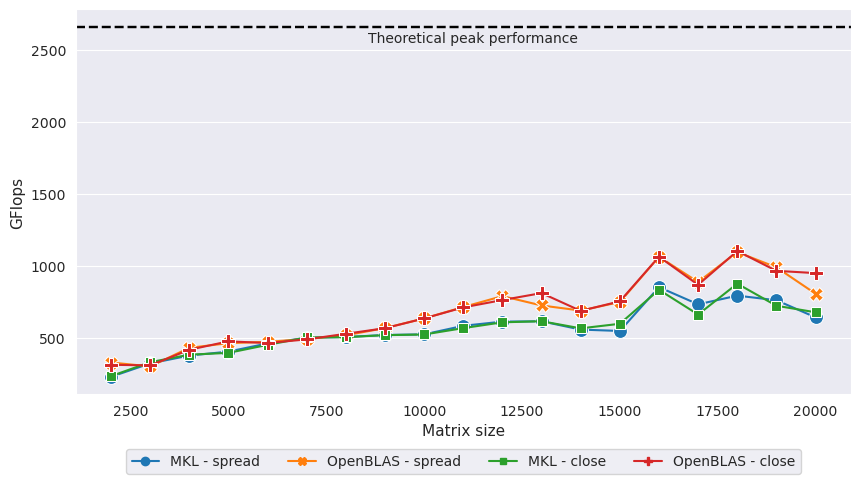

In [28]:
# Plot the results
plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='size',
             y='gflops', 
             hue='test', 
             data=ss_epyc_double, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             ).axhline(y=2662.4,        ## Theoretical peak performance line
                       color='black', 
                       linestyle='--', 
                       linewidth=1.75)
plt.text(x=11250, y=2585, s='Theoretical peak performance', va='center', ha='center')
## Styling
sns.set_style('darkgrid')
plt.ylabel('GFlops', fontsize=11)
plt.xlabel('Matrix size', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/size_scaling_epyc_double.png', dpi=250, bbox_inches='tight')
plt.show()

Same considerations as before, but here MKL doesn't peak in performance with small matrices.

## THIN nodes - single precision

In [29]:
# Gather data for the plot
node = 'THIN'
precision = 'float'

policy = 'spread'
ss_mkl_float_spread = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_float_spread = get_summary(
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
ss_mkl_float_close = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_float_close = get_summary(
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
ss_mkl_float_spread['test'] = 'MKL - spread'
ss_oblas_float_spread['test'] = 'OpenBLAS - spread'
ss_mkl_float_close['test'] = 'MKL - close'
ss_oblas_float_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
ss_thin_float = pd.concat([
    ss_mkl_float_spread, 
    ss_oblas_float_spread, 
    ss_mkl_float_close, 
    ss_oblas_float_close
    ])

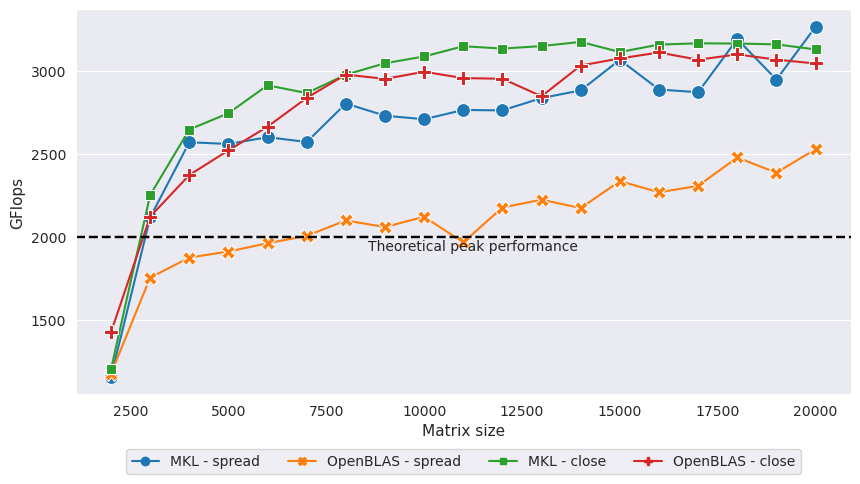

In [30]:
# Plot the results
plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='size',
             y='gflops', 
             hue='test', 
             data=ss_thin_float, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             ).axhline(y=1997,        ## Theoretical peak performance line
                       color='black', 
                       linestyle='--', 
                       linewidth=1.75)
plt.text(x=11250, y=1945, s='Theoretical peak performance', va='center', ha='center')
## Styling
sns.set_style('darkgrid')
plt.ylabel('GFlops', fontsize=11)
plt.xlabel('Matrix size', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/size_scaling_thin_float.png', dpi=250, bbox_inches='tight')
plt.show()

## THIN nodes - double precision

In [31]:
# Gather data for the plot

node = 'THIN'
precision = 'double'

policy = 'spread'
ss_mkl_double_spread = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_double_spread = get_summary(
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
ss_mkl_double_close = get_summary(
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
ss_oblas_double_close = get_summary(
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
ss_mkl_double_spread['test'] = 'MKL - spread'
ss_oblas_double_spread['test'] = 'OpenBLAS - spread'
ss_mkl_double_close['test'] = 'MKL - close'
ss_oblas_double_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
ss_thin_double = pd.concat([
    ss_mkl_double_spread, 
    ss_oblas_double_spread, 
    ss_mkl_double_close, 
    ss_oblas_double_close
    ])

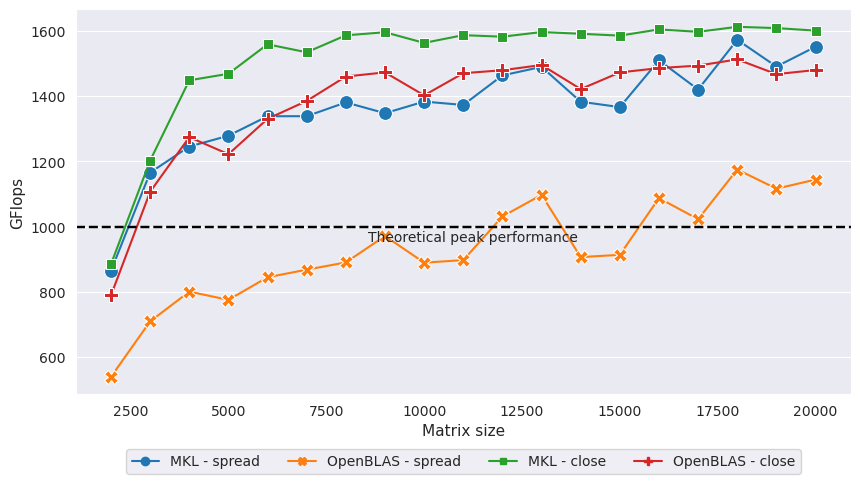

In [32]:
# Plot the results

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='size',
             y='gflops', 
             hue='test', 
             data=ss_thin_double, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             ).axhline(y=998.5,        ## Theoretical peak performance line
                       color='black', 
                       linestyle='--', 
                       linewidth=1.75)
plt.text(x=11250, y=967, s='Theoretical peak performance', va='center', ha='center')
## Styling
sns.set_style('darkgrid')
plt.ylabel('GFlops', fontsize=11)
plt.xlabel('Matrix size', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/size_scaling_thin_double.png', dpi=25, bbox_inches='tight')
plt.show()

# Core scaling

To analyze the results, two indexes are going to be considered:
- Speedup: $S(n, t) = \frac{T_{s}(n)}{T_{p}(n)}$
    - The speedup measures how much faster the parallel algorithm is compared to the sequential one.
    - $p$ is the number of used cores.
    - $T_{s}(n)$ is the time taken by the sequential algorithm.
    - $T_{p}(n)$ is the time taken by the parallel algorithm.
- Efficiency: $E(n, t) = \frac{S(n, t)}{p}$
    - The efficiency measures the percentage of time for which a processor is utilized effectively.

The theorical maximum speedup is $p$, while the maximum efficiency is $1$.


## EPYC nodes - single precision

In [43]:
# Gather data for the plot

node = 'EPYC'
precision = 'float'

policy = 'spread'
cs_mkl_float_spread = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_float_spread = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
cs_mkl_float_close = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_float_close = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
cs_mkl_float_spread['test'] = 'MKL - spread'
cs_oblas_float_spread['test'] = 'OpenBLAS - spread'
cs_mkl_float_close['test'] = 'MKL - close'
cs_oblas_float_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
cs_epyc_float = pd.concat([
    cs_mkl_float_spread, 
    cs_oblas_float_spread, 
    cs_mkl_float_close, 
    cs_oblas_float_close
    ])

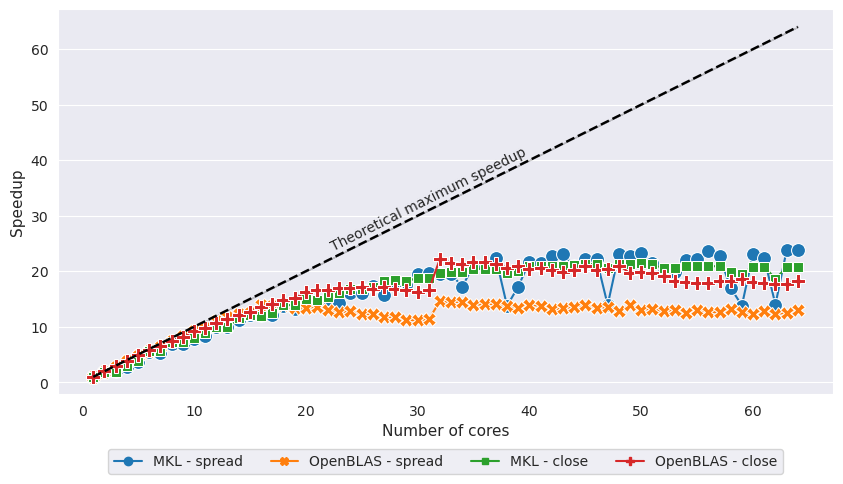

In [56]:
# Plot the results - speedup

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='n_cores',
             y='speedup', 
             hue='test', 
             data=cs_epyc_float, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             )
## Theoretical maximum speedup line
sns.lineplot(x='n_cores', y='n_cores', data=cs_epyc_float, color='black', linestyle='--', linewidth=1.75)
plt.text(x=31, y=33, s='Theoretical maximum speedup', va='center', ha='center', rotation=45, rotation_mode='anchor', transform_rotates_text=True)
## Styling
sns.set_style('darkgrid')
plt.ylabel('Speedup', fontsize=11)
plt.xlabel('Number of cores', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/core_scaling_epyc_float.png', dpi=250, bbox_inches='tight')
plt.show()

The trend is clearly sublinear, as expected.

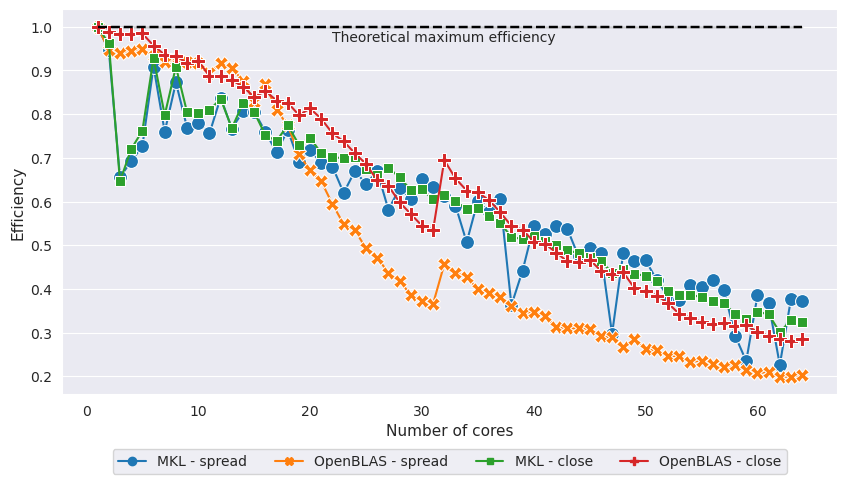

In [57]:
# Plot the results - efficiency

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='n_cores',
             y='efficiency', 
             hue='test', 
             data=cs_epyc_float, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             )
## Theoretical maximum efficiency line
sns.lineplot(x='n_cores', y=1, data=cs_epyc_float, color='black', linestyle='--', linewidth=1.75)
plt.text(x=32, y=0.975, s='Theoretical maximum efficiency', va='center', ha='center')
## Styling
sns.set_style('darkgrid')
plt.ylabel('Efficiency', fontsize=11)
plt.xlabel('Number of cores', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/core_scaling_epyc_float_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

By looking at the speedup plot, it seems that after the 16th core, the accelleration in the speedup starts decreasing. This is probably due to the communication overhead.

## EPYC nodes - double precision

In [58]:
# Gather data for the plot

node = 'EPYC'
precision = 'double'

policy = 'spread'
cs_mkl_double_spread = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_double_spread = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
cs_mkl_double_close = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_double_close = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
cs_mkl_double_spread['test'] = 'MKL - spread'
cs_oblas_double_spread['test'] = 'OpenBLAS - spread'
cs_mkl_double_close['test'] = 'MKL - close'
cs_oblas_double_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
cs_epyc_double = pd.concat([
    cs_mkl_double_spread, 
    cs_oblas_double_spread, 
    cs_mkl_double_close, 
    cs_oblas_double_close
    ])

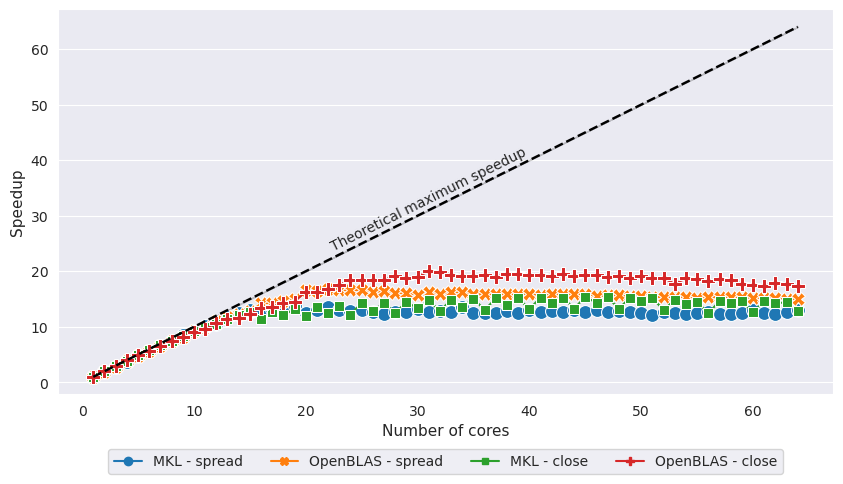

In [59]:
# Plot the results - speedup

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='n_cores',
             y='speedup', 
             hue='test', 
             data=cs_epyc_double, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             )
## Theoretical maximum speedup line
sns.lineplot(x='n_cores', y='n_cores', data=cs_epyc_double, color='black', linestyle='--', linewidth=1.75)
plt.text(x=31, y=33, s='Theoretical maximum speedup', va='center', ha='center', rotation=45, rotation_mode='anchor', transform_rotates_text=True)
## Styling
sns.set_style('darkgrid')
plt.ylabel('Speedup', fontsize=11)
plt.xlabel('Number of cores', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/core_scaling_epyc_double.png', dpi=250, bbox_inches='tight')
plt.show()


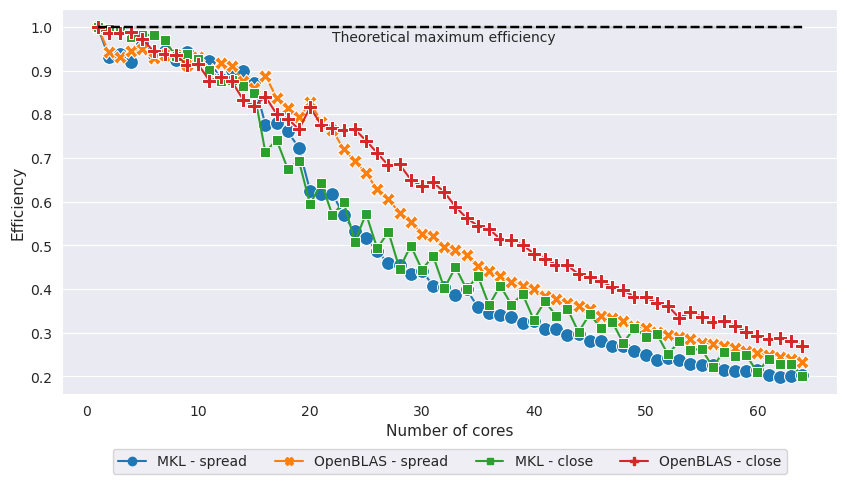

In [60]:
# Plot the results - efficiency

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='n_cores',
             y='efficiency', 
             hue='test', 
             data=cs_epyc_double, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             )
## Theoretical maximum efficiency line
sns.lineplot(x='n_cores', y=1, data=cs_epyc_double, color='black', linestyle='--', linewidth=1.75)
plt.text(x=32, y=0.975, s='Theoretical maximum efficiency', va='center', ha='center')
## Styling
sns.set_style('darkgrid')
plt.ylabel('Efficiency', fontsize=11)
plt.xlabel('Number of cores', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/core_scaling_epyc_double_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

The same considerations as before apply here.

## THIN nodes - single precision

In [61]:
# Gather data for the plot

node = 'THIN'
precision = 'float'

policy = 'spread'
cs_mkl_float_spread = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_float_spread = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
cs_mkl_float_close = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_float_close = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
cs_mkl_float_spread['test'] = 'MKL - spread'
cs_oblas_float_spread['test'] = 'OpenBLAS - spread'
cs_mkl_float_close['test'] = 'MKL - close'
cs_oblas_float_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes

cs_thin_float = pd.concat([
    cs_mkl_float_spread, 
    cs_oblas_float_spread, 
    cs_mkl_float_close, 
    cs_oblas_float_close
    ])

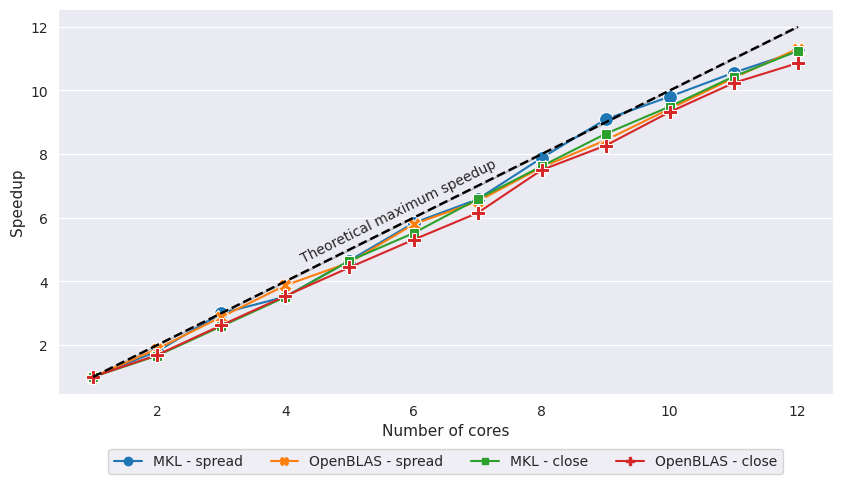

In [66]:
# Plot the results - speedup

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='n_cores',
             y='speedup', 
             hue='test', 
             data=cs_thin_float, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             )
## Theoretical maximum speedup line
sns.lineplot(x='n_cores', y='n_cores', data=cs_thin_float, color='black', linestyle='--', linewidth=1.75)
plt.text(x=5.775, y=6.225, s='Theoretical maximum speedup', va='center', ha='center', rotation=45, rotation_mode='anchor', transform_rotates_text=True)
## Styling
sns.set_style('darkgrid')
plt.ylabel('Speedup', fontsize=11)
plt.xlabel('Number of cores', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/core_scaling_thin_float.png', dpi=250, bbox_inches='tight')
plt.show()

Given that THIN nodes show good results, when analyzing the speedup, for all the libraries, it has been decided to stop here the analysis and not to go further with the efficiency.

## THIN nodes - double precision

In [69]:
# Gather data for the plot

node = 'THIN'
precision = 'double'

policy = 'spread'
cs_mkl_double_spread = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_double_spread = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node, 
    precision=precision, 
    policy=policy
)

policy = 'close'
cs_mkl_double_close = get_summary(
    test = 'core_scaling',
    lib = 'mkl',
    node=node, 
    precision=precision, 
    policy=policy
)
cs_oblas_double_close = get_summary(
    test = 'core_scaling',
    lib = 'oblas',
    node=node,
    precision=precision,
    policy=policy
)

## Add discriminant column to differentiate tests
cs_mkl_double_spread['test'] = 'MKL - spread'
cs_oblas_double_spread['test'] = 'OpenBLAS - spread'
cs_mkl_double_close['test'] = 'MKL - close'
cs_oblas_double_close['test'] = 'OpenBLAS - close'

## Concatenate dataframes
cs_thin_double = pd.concat([
    cs_mkl_double_spread, 
    cs_oblas_double_spread, 
    cs_mkl_double_close, 
    cs_oblas_double_close
    ])

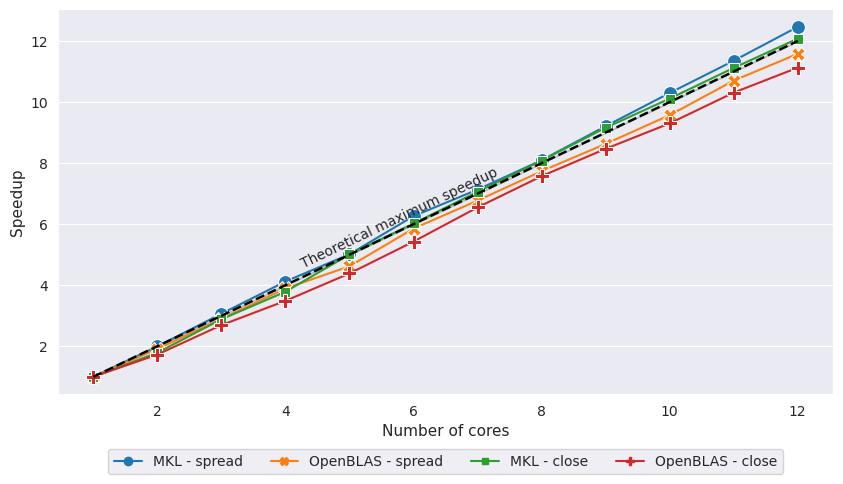

In [70]:
# Plot the results - speedup

plt.figure(figsize=(10, 5))
## Result lines
sns.lineplot(x='n_cores',
             y='speedup', 
             hue='test', 
             data=cs_thin_double, 
             markers=True, 
             markersize=10, 
             style='test', 
             dashes=False
             )
## Theoretical maximum speedup line
sns.lineplot(x='n_cores', y='n_cores', data=cs_thin_double, color='black', linestyle='--', linewidth=1.75)
plt.text(x=5.775, y=6.225, s='Theoretical maximum speedup', va='center', ha='center', rotation=45, rotation_mode='anchor', transform_rotates_text=True)
## Styling
sns.set_style('darkgrid')
plt.ylabel('Speedup', fontsize=11)
plt.xlabel('Number of cores', fontsize=11)
plt.legend(bbox_to_anchor=(0.5, -0.225), loc='lower center', ncol=4, title='')
plt.grid(False, axis='x')
## Save and show plot
plt.savefig('assets/core_scaling_thin_double.png', dpi=250, bbox_inches='tight')
plt.show()

For both single and double precision MKL shows the best results, even going over the theoretical maximum speedup.

Also OpenBLAS performs quite well.